In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing file

In [2]:
df= pd.read_csv(r"C:\Users\gauri\Downloads\DataCoSupplyChainDataset.csv",encoding='ISO-8859-1')

# reading the data

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Check for null values

In [4]:
df.shape

(180519, 53)

In [5]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [6]:
df.drop(['Order Zipcode'], axis=1, inplace=True)

In [7]:
df.drop(['Product Description'], axis=1, inplace=True)

In [8]:
df['Customer Lname'].fillna("Nothing")

0          Holloway
1              Luna
2         Maldonado
3              Tate
4         Hendricks
            ...    
180514     Peterson
180515        Clark
180516        Smith
180517        Smith
180518       Ortega
Name: Customer Lname, Length: 180519, dtype: object

In [9]:
df['Customer Zipcode'].fillna(0, inplace=True)

C:\Users\gauri\AppData\Local\Temp\ipykernel_36764\2533008101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Zipcode'].fillna(0, inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Now Finally We will Visualize the data

# 1. Shipping and Delivery Analysis

# What is the average difference between scheduled and actual shipping days? **

In [11]:
df['Shipping Difference']= df['Days for shipping (real)']- df['Days for shipment (scheduled)']
avg_diff = df['Shipping Difference'].mean()
avg_diff

0.5658074773292562

# How does late delivery risk correlate with specific products or categories?

In [12]:
df['Late_delivery_risk'].unique()

array([0, 1], dtype=int64)

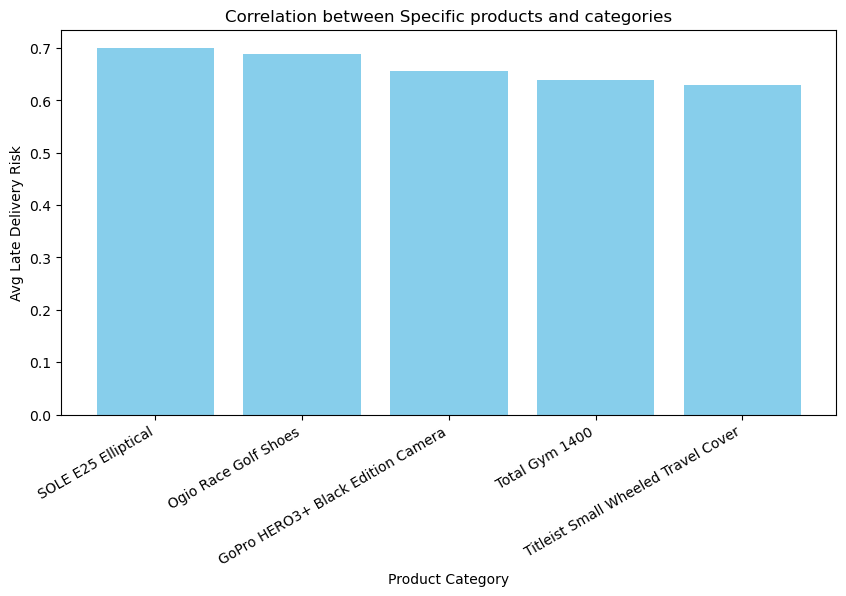

In [13]:
category_risk= df.groupby('Product Name')['Late_delivery_risk'].mean().reset_index().nlargest(5,'Late_delivery_risk')
plt.figure(figsize=(10,5))
plt.bar(category_risk['Product Name'], category_risk['Late_delivery_risk'], color='skyblue')
plt.title('Correlation between Specific products and categories')
plt.xlabel('Product Category')
plt.ylabel('Avg Late Delivery Risk')
plt.xticks(rotation=30, ha='right')
plt.show()

# Which regions or states have the highest incidence of late deliveries?

         Order State  total_orders  late_delivery
0               Abia            36             18
1            Abruzos            61             35
2               Aceh            19             15
3               Acre            36             17
4           Adamaoua            14              3
...              ...           ...            ...
1084        iauliai             8              1
1085          ilina             5              5
1086       Çanakkale             6              6
1087        Équateur            47             19
1088  Ústí nad Labem            14             14

[1089 rows x 3 columns]


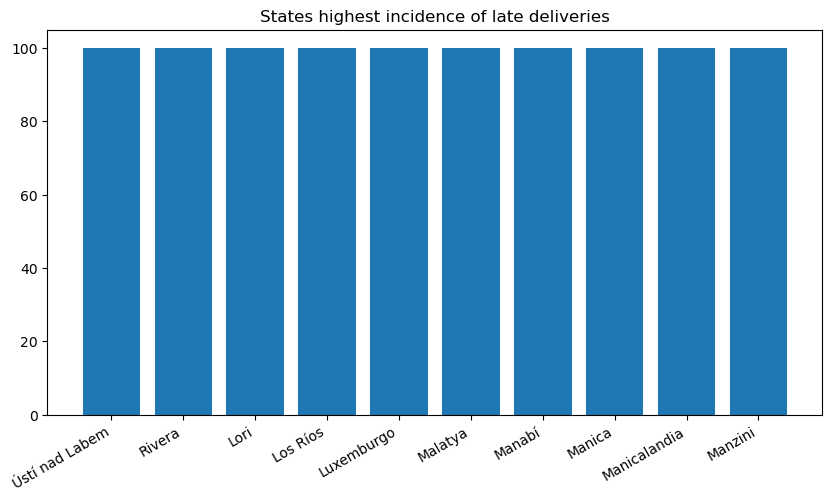

In [14]:
region_late_delivery= df.groupby('Order State').agg(
    total_orders= ('Order Id','count'),
    late_delivery= ('Late_delivery_risk','sum')
).reset_index()
print(region_late_delivery)
region_late_delivery['late_delivery_percentage']= (
    region_late_delivery['late_delivery']/region_late_delivery['total_orders']
)*100
region_late_delivery=region_late_delivery.sort_values(by='late_delivery_percentage', ascending= False).nlargest(10,'late_delivery_percentage')

plt.figure(figsize=(10,5))
plt.bar(region_late_delivery['Order State'],region_late_delivery['late_delivery_percentage'] )
plt.title('States highest incidence of late deliveries')
plt.xticks(rotation=30, ha='right')
plt.show()

# Is there a pattern in late deliveries based on the shipping mode used (e.g., Standard Class)?

In [15]:
df['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

    Shipping Mode  total_orders  late_deliveries
0     First Class         27814            26513
1        Same Day          9737             4454
2    Second Class         35216            26987
3  Standard Class        107752            41023


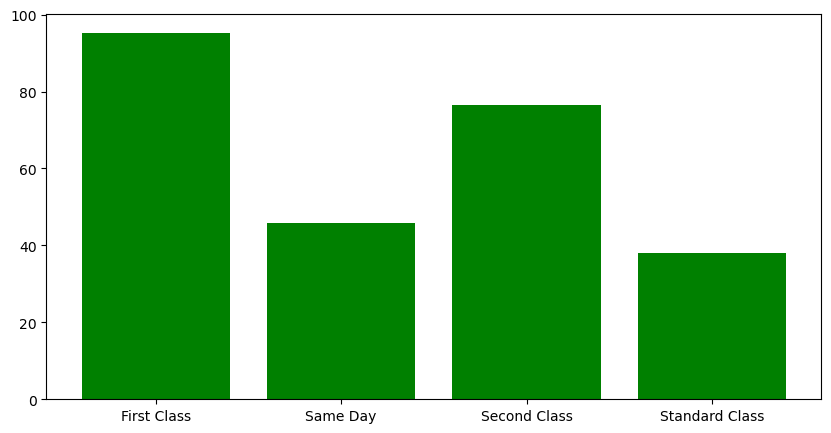

In [16]:
shipping_mode_delivery_mode= df.groupby('Shipping Mode').agg(
    total_orders=('Order Id','count'),
    late_deliveries=('Late_delivery_risk','sum')    
).reset_index()
print(shipping_mode_delivery_mode)
shipping_mode_delivery_mode['late_delivery_rate']= (
    shipping_mode_delivery_mode['late_deliveries']/shipping_mode_delivery_mode['total_orders']
)*100

plt.figure(figsize=(10,5))
plt.bar(shipping_mode_delivery_mode['Shipping Mode'], shipping_mode_delivery_mode['late_delivery_rate'], color='green')
plt.show()

# 2. Sales and Profit Analysis

# What are the top 10 products by total sales and profit margin?

In [17]:
df.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

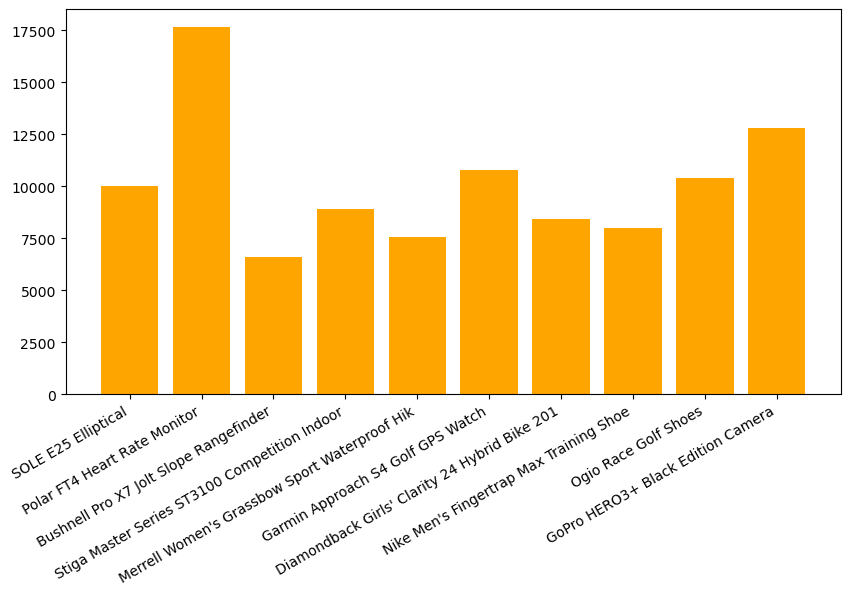

In [18]:
df['total_sales']= df['Order Item Quantity']*df['Order Item Product Price']
df['profit']=df['total_sales']-df['Order Item Discount']
df['profit_percentage']=(df['profit']/df['total_sales'])*100

profit_margin = df.groupby('Product Name').agg(
    total_sales= ('total_sales','sum'),
    profit_margin= ('profit_percentage', 'mean')
).reset_index().nlargest(10,'profit_margin')



plt.figure(figsize=(10,5))
plt.bar(profit_margin['Product Name'], profit_margin['profit_margin'], color='yellow')
plt.bar(profit_margin['Product Name'], profit_margin['total_sales'] ,color='orange')
plt.xticks(rotation=30, ha='right')
plt.show()

# How does the sales per customer vary across different customer segments?

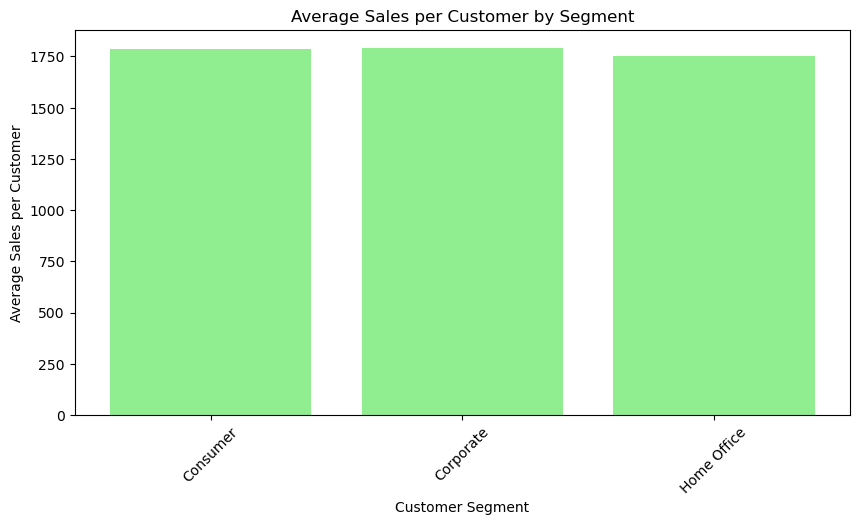

In [19]:
df['total_sales']= df['Order Item Quantity']*df['Order Item Product Price']
customer_segment= df.groupby(['Customer Segment', 'Customer Id']).agg(
    total_sales_per_customer= ('total_sales','sum')
).reset_index()

segment_sales= customer_segment.groupby('Customer Segment').agg(
    avg_sales_per_customer= ('total_sales_per_customer','mean')
).reset_index()
plt.figure(figsize=(10,5))
plt.bar(segment_sales['Customer Segment'], segment_sales['avg_sales_per_customer'], color='lightgreen')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales per Customer')
plt.title('Average Sales per Customer by Segment')
plt.xticks(rotation=45)
plt.show()

# Which customer demographics contribute most to high-profit orders?

Top Customer Demographics by Total Profit:
  Customer Segment  total_orders  high_profit_orders  total_profit  \
0         Consumer         93504               23343  1.716425e+07   
1        Corporate         54789               13685  1.003064e+07   
2      Home Office         32226                8051  5.859466e+06   

   high_profit_percentage  
0               24.964707  
1               24.977641  
2               24.982933  

Top Customer Demographics by High-Profit Percentage:
  Customer Segment  total_orders  high_profit_orders  total_profit  \
2      Home Office         32226                8051  5.859466e+06   
1        Corporate         54789               13685  1.003064e+07   
0         Consumer         93504               23343  1.716425e+07   

   high_profit_percentage  
2               24.982933  
1               24.977641  
0               24.964707  


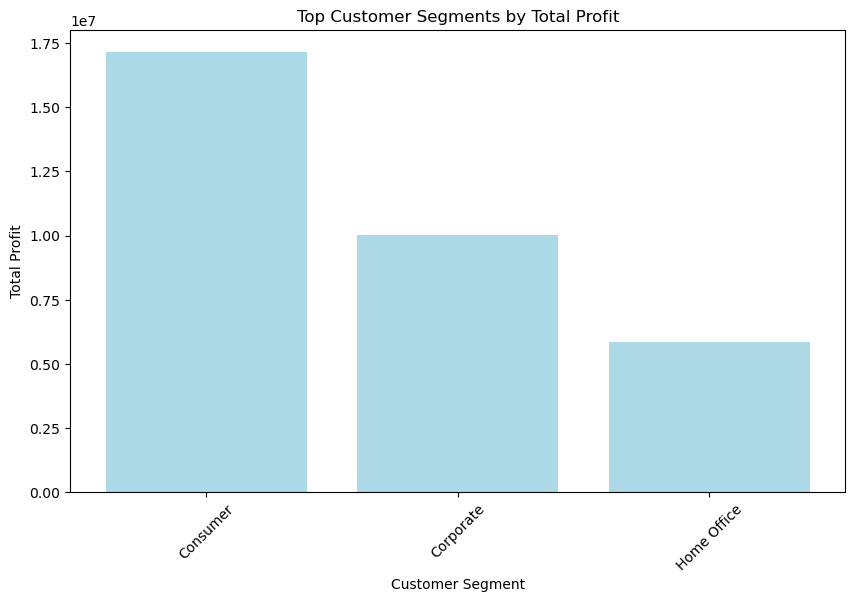

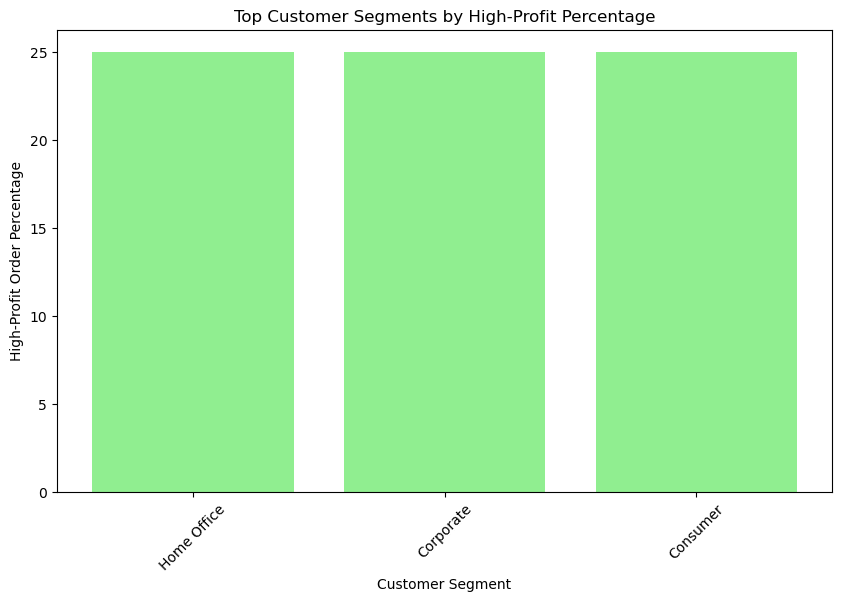

In [20]:

# Step 1: Calculate total sales and profit for each order
df['total_sales'] = df['Order Item Quantity'] * df['Order Item Product Price']
df['profit'] = df['total_sales'] - df['Order Item Discount']

# Step 2: Define high-profit orders (e.g., orders with profit above 75th percentile)
high_profit_threshold = df['profit'].quantile(0.75)
df['high_profit_order'] = df['profit'] > high_profit_threshold

# Step 3: Group by relevant customer demographics and calculate high-profit orders
# You can replace 'Customer Segment' with other demographic columns like 'Customer Region' or 'Customer Country'
demographic_high_profit = df.groupby('Customer Segment').agg(
    total_orders=('Order Id', 'count'),
    high_profit_orders=('high_profit_order', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Step 4: Calculate the percentage of high-profit orders per demographic
demographic_high_profit['high_profit_percentage'] = (
    demographic_high_profit['high_profit_orders'] / demographic_high_profit['total_orders']
) * 100

# Step 5: Sort the demographics by total profit or high-profit percentage
top_demographics_by_profit = demographic_high_profit.sort_values(by='total_profit', ascending=False).head(10)
top_demographics_by_high_profit_percentage = demographic_high_profit.sort_values(by='high_profit_percentage', ascending=False).head(10)

# Display the top customer demographics by total profit and high-profit percentage
print("Top Customer Demographics by Total Profit:")
print(top_demographics_by_profit)

print("\nTop Customer Demographics by High-Profit Percentage:")
print(top_demographics_by_high_profit_percentage)

# Step 6: Plotting the results (Top by total profit)
plt.figure(figsize=(10, 6))
plt.bar(top_demographics_by_profit['Customer Segment'], top_demographics_by_profit['total_profit'], color='lightblue')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.title('Top Customer Segments by Total Profit')
plt.xticks(rotation=45)
plt.show()

# Step 7: Plotting the results (Top by high-profit percentage)
plt.figure(figsize=(10, 6))
plt.bar(top_demographics_by_high_profit_percentage['Customer Segment'], top_demographics_by_high_profit_percentage['high_profit_percentage'], color='lightgreen')
plt.xlabel('Customer Segment')
plt.ylabel('High-Profit Order Percentage')
plt.title('Top Customer Segments by High-Profit Percentage')
plt.xticks(rotation=45)
plt.show()


# What is the profit margin by product category and how does it vary across regions?

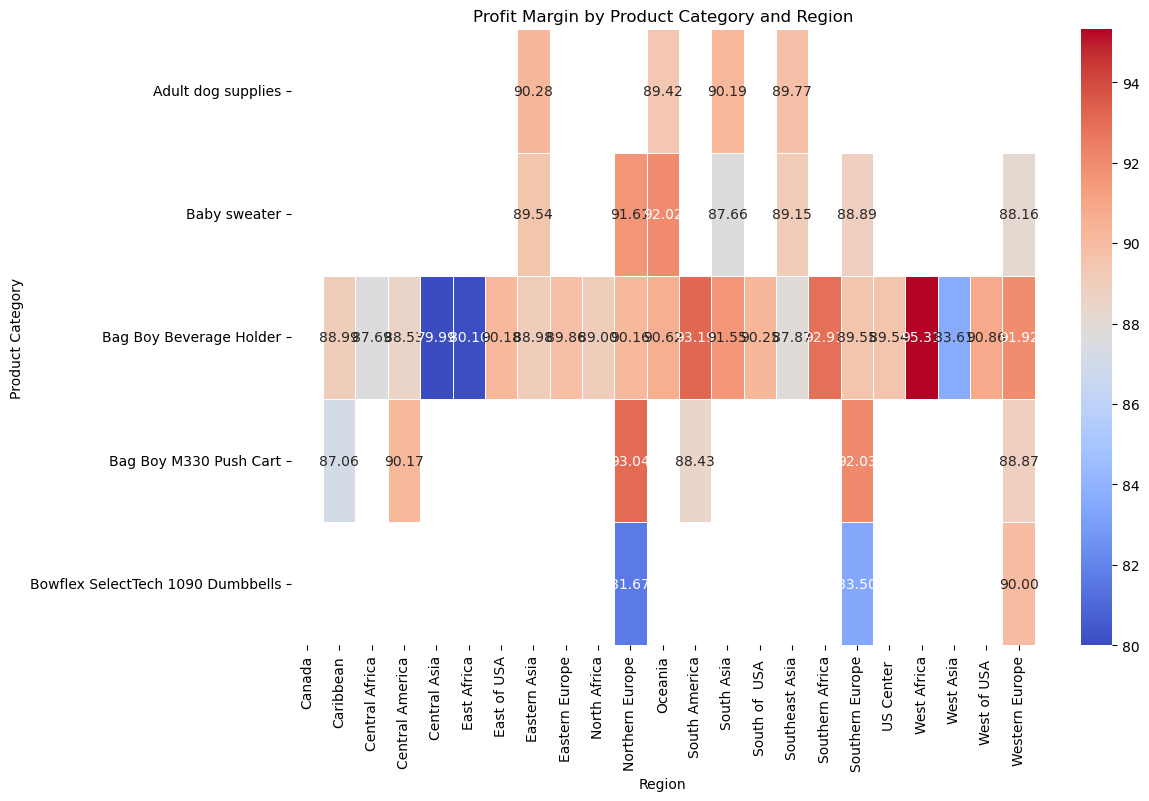

In [24]:

df['total_sales'] = df['Order Item Quantity'] * df['Order Item Product Price']
df['profit'] = df['total_sales'] - df['Order Item Discount']
df['profit_margin'] = (df['profit'] / df['total_sales']) * 100
category_region_profit = df.groupby(['Product Name', 'Order Region']).agg(
    total_sales=('total_sales', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

category_region_profit['profit_margin'] = (category_region_profit['total_profit'] / category_region_profit['total_sales']) * 100

profit_margin_pivot = category_region_profit.pivot(index='Product Name', columns='Order Region', values='profit_margin')
profit_margin_pivot5=profit_margin_pivot.head(5)
plt.figure(figsize=(12, 8))
sns.heatmap(profit_margin_pivot5, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Profit Margin by Product Category and Region')
plt.xlabel('Region')
plt.ylabel('Product Category')
plt.show()


# 3. Customer Behavior Analysis

# Which cities or countries generate the most revenue?


In [25]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

# Which cities or countries generate the most revenue?

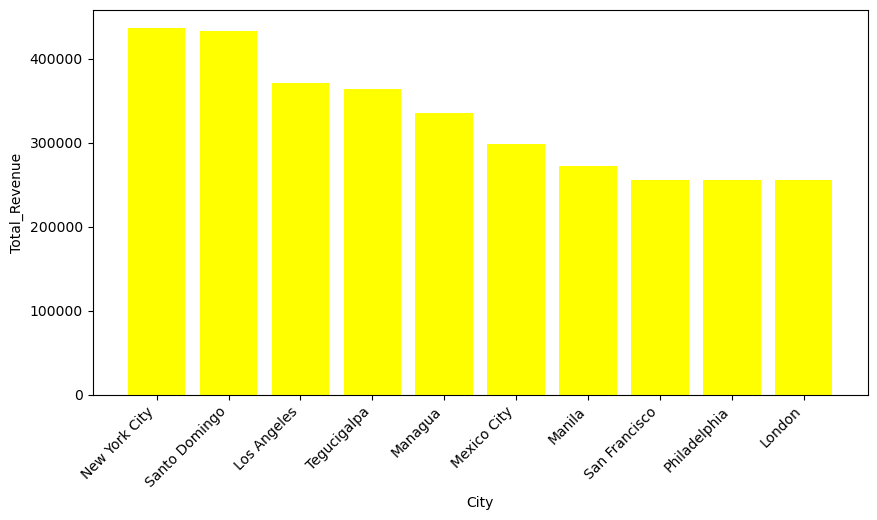

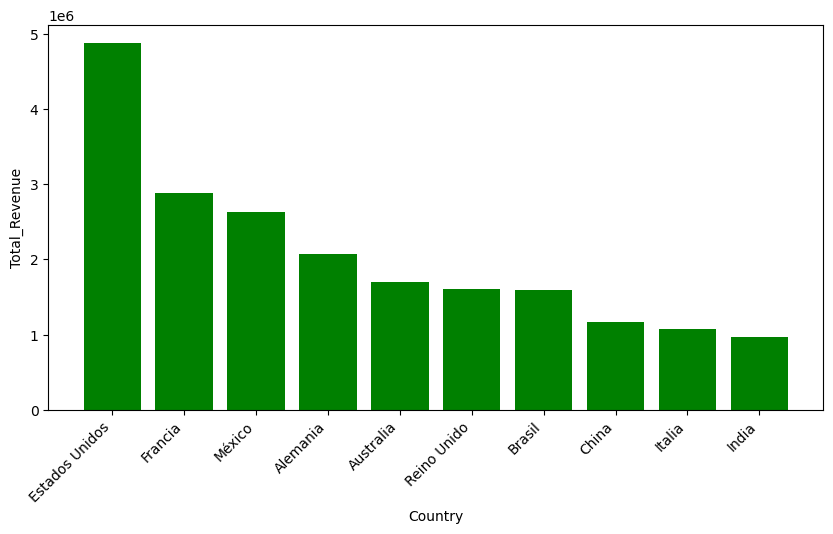

In [31]:
df['total_sales']= df['Order Item Quantity']*df['Order Item Product Price']
city_revenue=df.groupby('Order City').agg(
    total_revenue= ('total_sales','sum')
).reset_index()
country_revenue=df.groupby('Order Country').agg(
    total_revenue= ('total_sales','sum')
).reset_index()


total_revenue_citites= city_revenue.sort_values(by='total_revenue', ascending=False).head(10)
total_revenue_countries= country_revenue.sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(total_revenue_citites['Order City'], total_revenue_citites['total_revenue'], color='yellow')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Total_Revenue')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(total_revenue_countries['Order Country'], total_revenue_countries['total_revenue'], color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Total_Revenue')
plt.show()

# 4. Product and Category Insights

# What are the most and least popular product categories?

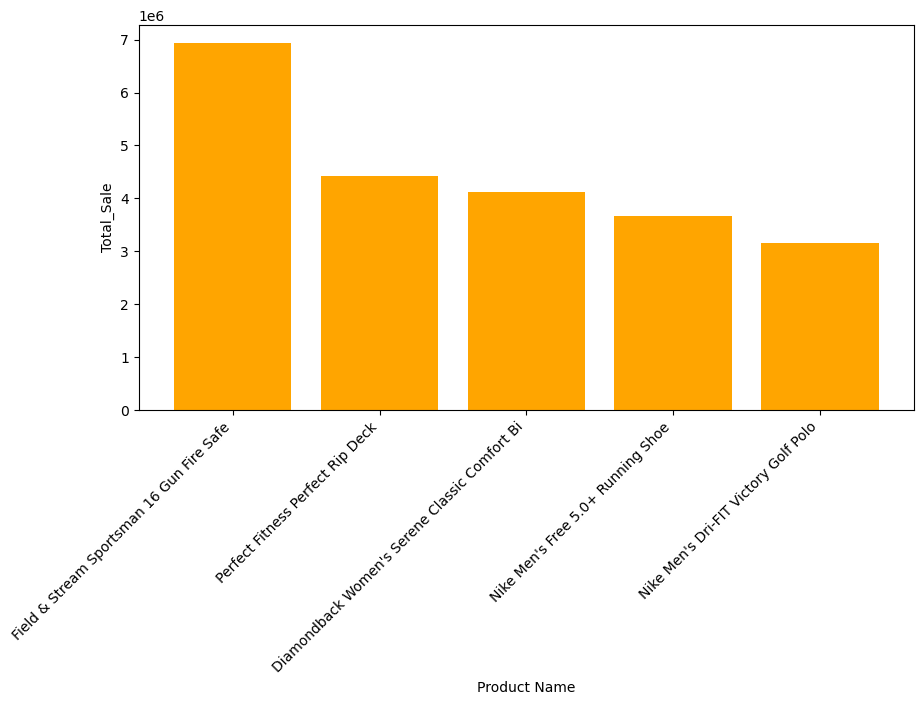

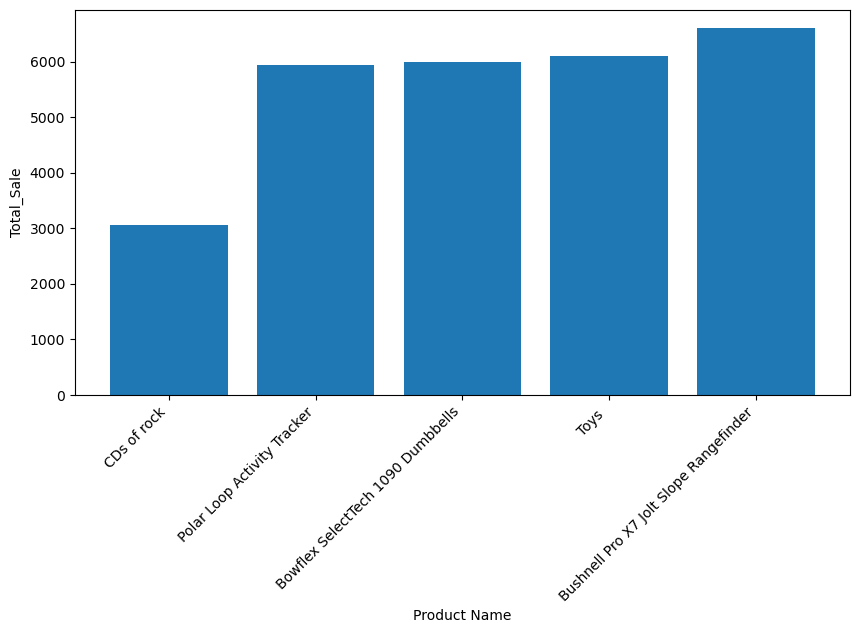

In [41]:
df['total_sale']= df['Order Item Product Price']*df['Order Item Quantity']
product_by_sale= df.groupby('Product Name').agg(
    total_sale_product= ('total_sale','sum')
).reset_index()

most_popular_category = product_by_sale.sort_values(by='total_sale_product', ascending=False).head(5)
least_popular_category= product_by_sale.sort_values(by='total_sale_product', ascending=True).head(5)

plt.figure(figsize=(10,5))
plt.bar(most_popular_category['Product Name'], most_popular_category['total_sale_product'], color='orange')
plt.xlabel('Product Name')
plt.ylabel('Total_Sale')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(least_popular_category['Product Name'], least_popular_category['total_sale_product'])
plt.xlabel('Product Name')
plt.ylabel('Total_Sale')
plt.xticks(rotation=45, ha='right')
plt.show()

# How does product price correlate with the frequency of orders?

-0.03123853035871062


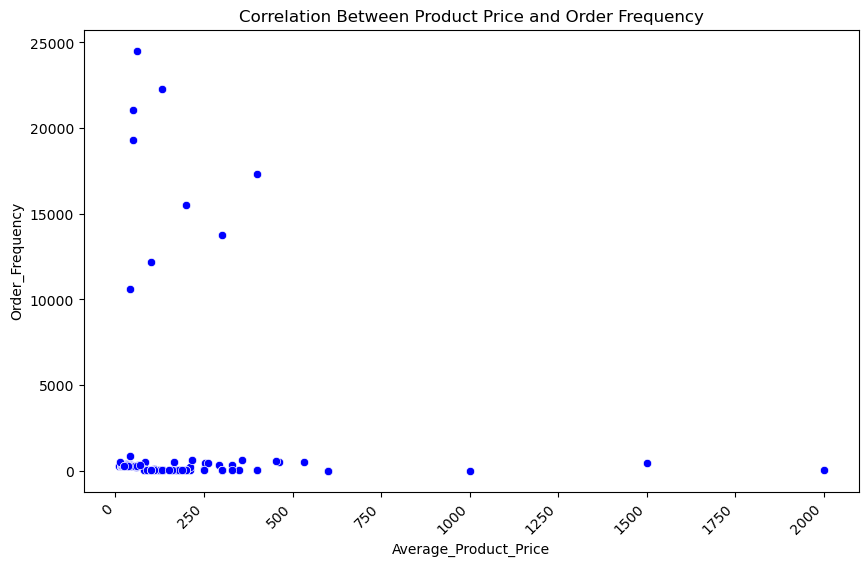

In [58]:

frequency= df.groupby('Product Name').agg(
    avg_price= ('Order Item Product Price','mean'),
    freq= ('Order Id','count')
).reset_index()

correlation= frequency['avg_price'].corr(frequency['freq'])
print(correlation)
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_price', y='freq',data=frequency,color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Between Product Price and Order Frequency')
plt.xlabel('Average_Product_Price')
plt.ylabel('Order_Frequency')
plt.show()

# Which products have the highest return on investment (ROI) based on sales and profit data?

                                      Product Name  total_sale_of_product  \
0                               Adult dog supplies           41524.800753   
1                                     Baby sweater           12229.560379   
2                          Bag Boy Beverage Holder           21116.549806   
3                           Bag Boy M330 Push Cart           16637.919555   
4                Bowflex SelectTech 1090 Dumbbells            5999.899902   
..                                             ...                    ...   
113          adidas Kids' F5 Messi FG Soccer Cleat           27327.191312   
114     adidas Men's F10 Messi TRX FG Soccer Cleat           56330.611578   
115      adidas Men's Germany Black Crest Away Tee           21475.000000   
116  adidas Youth Germany Black/Red Away Match Soc           67830.000000   
117               insta-bed Neverflat Air Mattress            8999.400330   

     total_profit_generate        roi  
0             37318.300785  89.8699

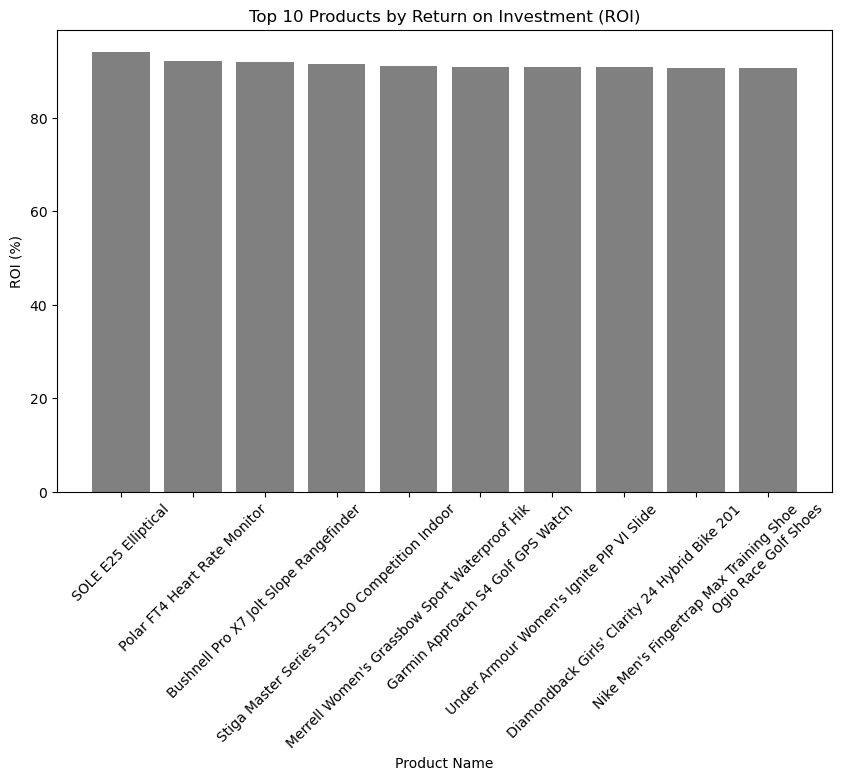

In [69]:
df['total_sales']= df['Order Item Product Price']* df['Order Item Quantity']
df['total_profit']= df['total_sales']-df['Order Item Discount']



roi_based_on_sale_and_profit= df.groupby('Product Name').agg(
    total_sale_of_product=('total_sales','sum'),
    total_profit_generate=('total_profit', 'sum'),
    
).reset_index()
roi_based_on_sale_and_profit['roi']= (roi_based_on_sale_and_profit['total_profit_generate']/roi_based_on_sale_and_profit['total_sale_of_product'])*100
roi_based_on_sale_and_profit_only_10= roi_based_on_sale_and_profit.sort_values(by='roi', ascending=False).head(10)
print(roi_based_on_sale_and_profit)

plt.figure(figsize=(10,6))
plt.bar(roi_based_on_sale_and_profit_only_10['Product Name'], roi_based_on_sale_and_profit_only_10['roi'], color='grey')
plt.xlabel('Product Name')
plt.ylabel('ROI (%)')
plt.title('Top 10 Products by Return on Investment (ROI)')
plt.xticks(rotation=45)
plt.show()

# What are the patterns in product pricing across different markets and regions?

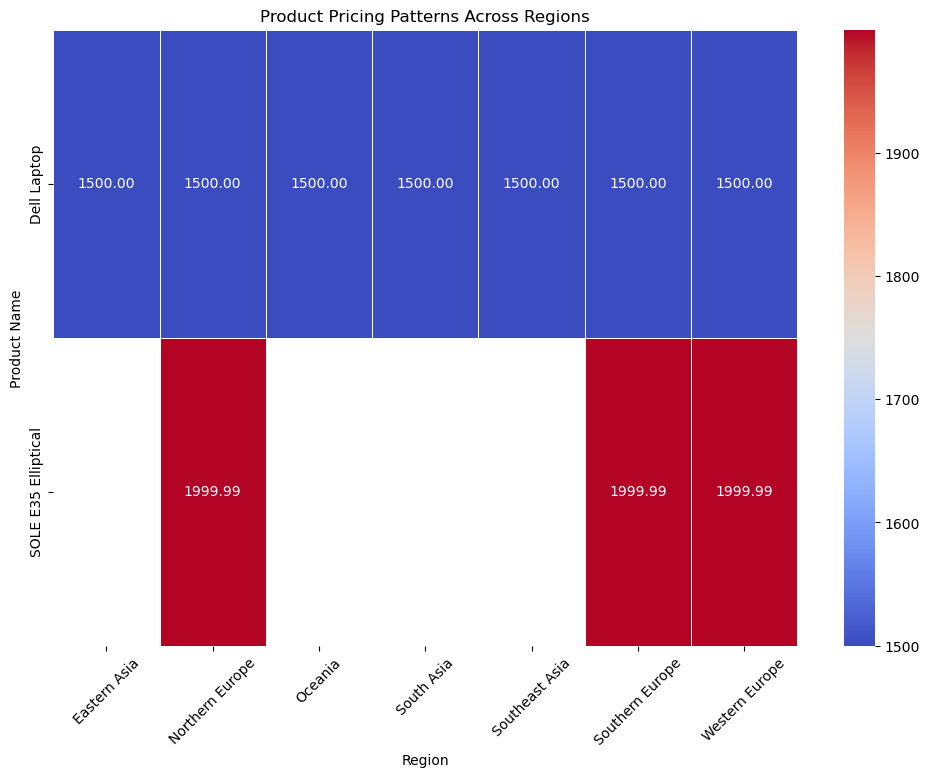

In [82]:
avg_price_in_diff_region= df.groupby(['Product Name', 'Order Region']).agg(
    avg_price= ('Order Item Product Price', 'mean')
).reset_index()
avg_price_in_diff_region10=avg_price_in_diff_region.nlargest(10,'avg_price')
price_pivot= avg_price_in_diff_region10.pivot(index='Product Name', columns='Order Region', values='avg_price')


plt.figure(figsize=(12, 8))
sns.heatmap(price_pivot, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Product Pricing Patterns Across Regions')
plt.xlabel('Region')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.show()
